# 1. 背景介绍－Kaggle: Titanic Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
#### 上传时在public board的排名为Top 2.6%

# 2. 准备数据

In [ ]:
import seaborn as sns
sns.set(style='white',context='notebook',palette='plasma')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 3. 理解数据

## 3.1 查看数据情况

In [216]:
full = train.append(test,ignore_index = True) #加上ignore_index后，两个表index从1到最后，而不是有两个1
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


无明显异常值，数据都在合理范围内。其中，Age/Cabin/Embarked/Fare几项有缺失。

#### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## 3.2 查看特征与标签间关系

### 3.1.1 Embarked vs Survived

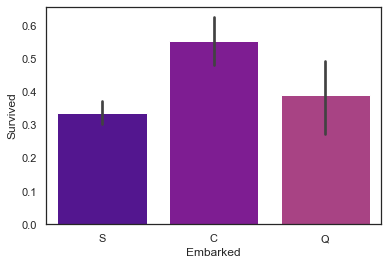

In [31]:
sns.barplot(train['Embarked'],train['Survived'])

In [5]:
print('Embarked为"S"的乘客，其生存率为%.2f'%full[full['Embarked']=='S']['Survived'].value_counts(normalize=True)[1])
print('Embarked为"C"的乘客，其生存率为%.2f'%full[full['Embarked']=='C']['Survived'].value_counts(normalize=True)[1])
print('Embarked为"Q"的乘客，其生存率为%.2f'%full[full['Embarked']=='Q']['Survived'].value_counts(normalize=True)[1])

Embarked为"S"的乘客，其生存率为0.34
Embarked为"C"的乘客，其生存率为0.55
Embarked为"Q"的乘客，其生存率为0.39


#### Embarked vs Pclass

法国登船乘客生存率较高原因可能与其头等舱乘客比例较高有关

In [637]:
bar_width = 0.3
x1 = [i for i in range(3)]
x2 = [i+bar_width for i in x1]
x3 = [i+bar_width for i in x2]
pclass_embarked = train[train['Pclass'].notnull()].groupby(by=['Embarked','Pclass']).count()
y1 = pclass_embarked['Name'].loc['S'].values
y2 = pclass_embarked['Name'].loc['C'].values
y3 = pclass_embarked['Name'].loc['Q'].values

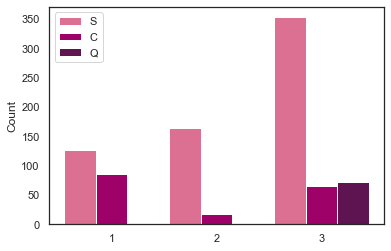

In [638]:
plt.bar(x1,y1,width=bar_width,label='S',color='palevioletred')
plt.bar(x2,y2,width=bar_width,label='C',color='#9e0168')
plt.bar(x3,y3,width=bar_width,label='Q',color='#5d1451')
x_tick = x2
xtick_label = ['1', '2', '3']
plt.xticks(x_tick,xtick_label)
plt.ylabel('Count')
plt.legend(loc=2)
#得到验证

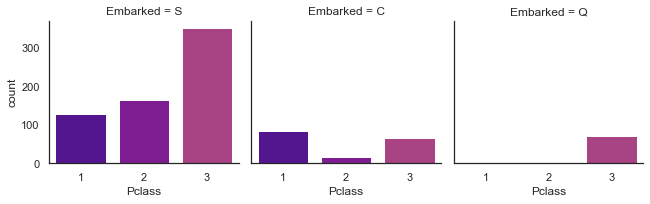

In [605]:
sns.factorplot('Pclass',col='Embarked',data=train,kind='count',size=3)

### 3.1.2 Parch vs Survived

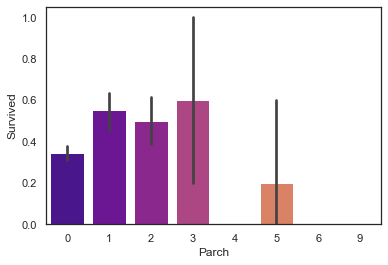

In [35]:
sns.barplot(train['Parch'],train['Survived'],palette='plasma')

当乘客同行的父母及子女数量适中时，生存率较高

### 3.1.3 Sibsp vs Survived

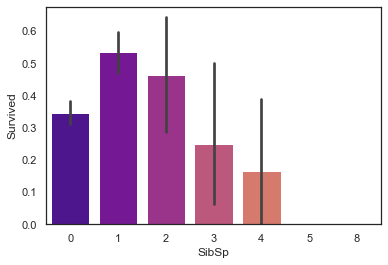

In [38]:
sns.barplot(train['SibSp'],train['Survived'],palette='plasma')

当乘客同行的同辈数量适中时生存率较高

### 3.1.4 Pclass vs Survived

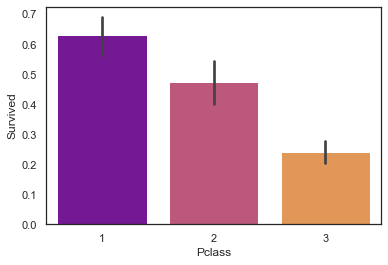

In [40]:
sns.barplot(train['Pclass'],train['Survived'],palette='plasma')

舱位级别越高，存活率越高

### 3.1.5 Sex vs Survived

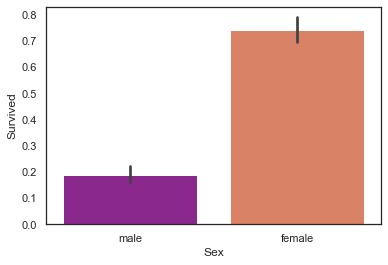

In [42]:
sns.barplot(train['Sex'],train['Survived'],palette='plasma')

女性存活率远高于男性

### 3.1.6 Fare vs Survived

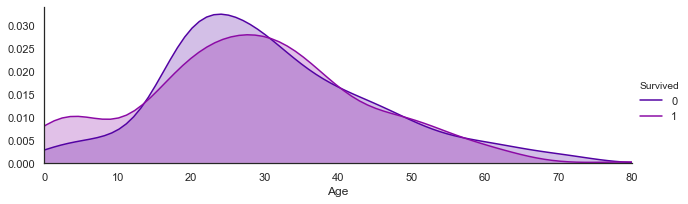

In [164]:
#创建坐标轴
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
#作图，选择图形类型
ageFacet.map(sns.kdeplot,'Age',shade=True)
#其他信息：坐标轴范围、标签等
ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()

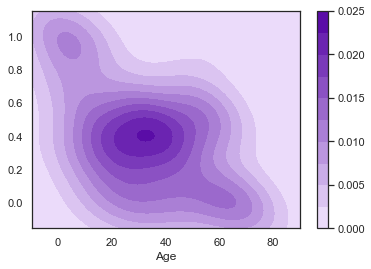

In [165]:
survival_rate = (train.groupby('Age').sum()/train.groupby('Age').count())['Survived']
sns.kdeplot(survival_rate.index,survival_rate.values,shade=True,cut=1,cbar=True)

二元图左高右低，0-10岁存活率高

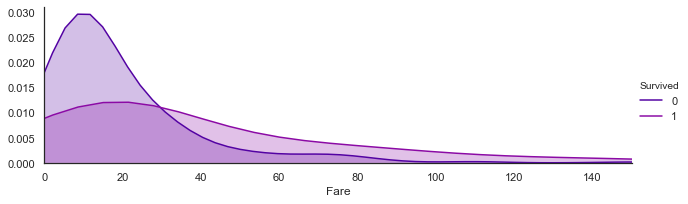

In [208]:
#创建坐标轴
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
#作图，选择图形类型
ageFacet.map(sns.kdeplot,'Fare',shade=True)
#其他信息：坐标轴范围、标签等
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

票价低于30时生存率极低，票价高时生存率一般较高

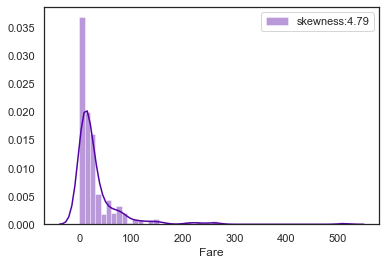

In [206]:
farePlot1=sns.distplot(train['Fare'][train['Fare'].notnull()],label='skewness:%.2f'%(train['Fare'].skew()))
farePlot1.legend(loc='best')

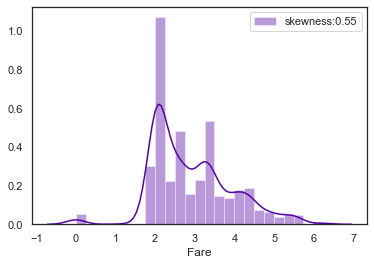

In [254]:
#偏度较高，要进行对数化处理
full['Fare'] = full['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
farePlot2=sns.distplot(full['Fare'][full['Fare'].notnull()],label='skewness:%.2f'%(full['Fare'].skew()))
farePlot2.legend(loc='best')

# 4. 数据预处理

## 4.1 数据清洗（缺失值以及异常值的处理）

In [293]:
full['Cabin'] = full['Cabin'].fillna('U')#unknown
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilyNum,FamilySize,TicketCount,TicketGroup
0,22.0,U,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,Mr,2,1,1,0
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,Mrs,2,1,2,1
2,26.0,U,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,Miss,1,0,1,0
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,Mrs,2,1,2,1
4,35.0,U,S,2.085672,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,Mr,1,0,1,0


In [23]:
full[full['Embarked'].notnull()]['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [295]:
full['Embarked'] = full['Embarked'].fillna('S')#只缺少1个数据，为s的可能性大，填充s

In [25]:
full[full['Fare'].isnull()]#根据3等舱、s登陆、cabin为unknown的平均票价估计

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,U,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [40]:
full = full.fillna(full[(full['Cabin']=='U')&(full['Embarked']=='S')&(full['Pclass']==3)]['Fare'].mean())
full.iloc[1043]

Age                          60.5
Cabin                           U
Embarked                        S
Fare                      14.5155
Name           Storey, Mr. Thomas
Parch                           0
PassengerId                  1044
Pclass                          3
Sex                          male
SibSp                           0
Survived                  14.5155
Ticket                       3701
Name: 1043, dtype: object

## 4.2 特征工程（基于对现有数据特征的理解构造的新特征，以挖掘数据的更多特点）

### 4.2.1 titles

In [217]:
full['Name']
full['Title'] = full['Name'].map(lambda x: x.split(', ')[1].split('.')[0])
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Capt              1
Sir               1
Dona              1
Don               1
Mme               1
the Countess      1
Jonkheer          1
Lady              1
Name: Title, dtype: int64

In [218]:
def replace_titles(x):
    title = x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady','Master']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms', 'Dona']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex'] =='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
full['Title'] = full.apply(replace_titles,axis=1)
full['Title'].unique()

array(['Mr', 'Mrs', 'Miss'], dtype=object)

### 4.2.2 familynum & familysize

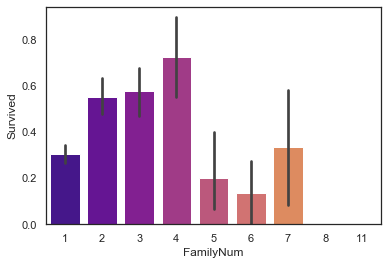

In [219]:
full['FamilyNum'] = full['SibSp']+full['Parch']+1
sns.barplot(full['FamilyNum'],full['Survived'],palette='plasma')
#家庭人数为2-4人时存活率较高，人数过多或者单独一个人存活率较低，进而将familysize分组

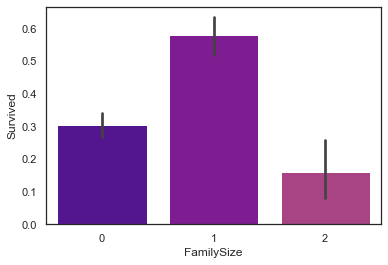

In [220]:
full['FamilySize'] = full['FamilyNum'].map(lambda x: 1 if 2<=x and x<=4 else 0 if x==1 else 2)
sns.barplot(full['FamilySize'],full['Survived'])
#family size适中时存活率更高

### 4.2.3 cabin

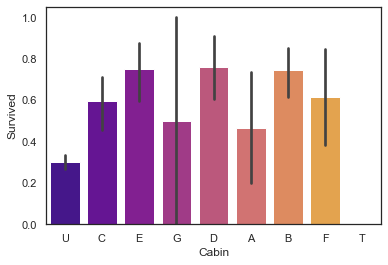

In [391]:
full['Cabin'] = full['Cabin'].map(lambda x: x[0])
sns.barplot(full['Cabin'],full['Survived'],palette='plasma')
#cabin为B/D/E时存活率高,U/T时存活率较低，C/G/A/F时候适中

### 4.2.4 ticketcount & ticketgroup

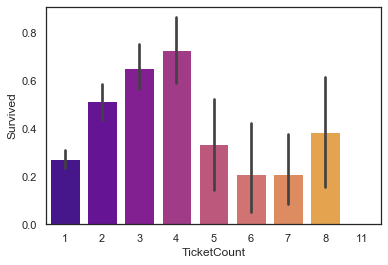

In [221]:
TicketDict = full['Ticket'].value_counts()
full['TicketCount'] = full['Ticket'].map(TicketDict)
sns.barplot(full['TicketCount'],full['Survived'],palette='plasma')
#同组票有2-4人时，存活率较高，仅一人或者人数过多时存活率较低

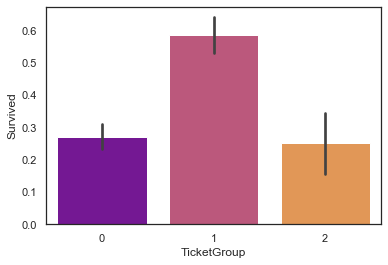

In [222]:
full['TicketGroup'] = full['TicketCount'].map(lambda x: 1 if x>=2 and x<=4 else 0 if x ==1 else 2)
sns.barplot(full['TicketGroup'],full['Survived'],palette='plasma')

### 4.2.5 sex

In [223]:
full['Sex'] = full['Sex'].map({'male':0,'female':1})

### 4.2.6 构建RandomForest预测模型填充null的age值

In [149]:
full.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,TicketCount,TicketGroup,FamilyNum,FamilySize
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221,-0.185284,-0.136441,-0.240229,-0.174901
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307,0.478940,0.501253,0.226492,0.287734
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629,0.647029,0.565073,0.792296,0.687001
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007,-0.010350,-0.021231,-0.031437,-0.047985
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481,-0.078554,-0.207236,0.050027,-0.067487
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322,0.679444,0.578176,0.861952,0.750411
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000,0.064962,0.151702,0.016639,0.108631
TicketCount,-0.185284,0.478940,0.647029,-0.010350,-0.078554,0.679444,0.064962,1.000000,0.877515,0.800556,0.667312
TicketGroup,-0.136441,0.501253,0.565073,-0.021231,-0.207236,0.578176,0.151702,0.877515,1.000000,0.689151,0.746421
FamilyNum,-0.240229,0.226492,0.792296,-0.031437,0.050027,0.861952,0.016639,0.800556,0.689151,1.000000,0.869082


In [262]:
AgePre=full[['Age','Parch','Fare','Sex','Pclass','SibSp','Title','FamilyNum','TicketCount']]
AgePre=pd.get_dummies(AgePre)
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')
SexAge=pd.get_dummies(AgePre['Sex'],prefix='Sex')
#查看变量间相关性
AgeCorrDf=pd.DataFrame()
AgeCorrDf=AgePre.corr()
AgeCorrDf['Age'].sort_values()

Pclass        -0.408106
Title_Miss    -0.280800
SibSp         -0.243699
FamilyNum     -0.240229
TicketCount   -0.185284
Parch         -0.150917
Sex           -0.063645
Title_Mrs      0.004350
Fare           0.188349
Title_Mr       0.225321
Age            1.000000
Name: Age, dtype: float64

In [264]:
AgePre.mean()

Age            29.881138
Parch           0.385027
Fare            2.908367
Sex             0.355997
Pclass          2.294882
SibSp           0.498854
FamilyNum       1.883881
TicketCount     2.101604
Title_Miss      0.202445
Title_Mr        0.592055
Title_Mrs       0.205500
dtype: float64

In [265]:
#拼接数据
AgePre=pd.concat([AgePre,ParAge,SibAge,PclAge,SexAge],axis=1)
AgePre.head()

,Age,Parch,Fare,Sex,Pclass,SibSp,FamilyNum,TicketCount,Title_Miss,Title_Mr,...,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,22.0,0,1.981001,0,3,1,2,1,0,1,...,0,0,0,0,0,0,0,1,1,0
1,38.0,0,4.266662,1,1,1,2,2,0,0,...,0,0,0,0,0,1,0,0,0,1
2,26.0,0,2.070022,1,3,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,1
3,35.0,0,3.972177,1,1,1,2,2,0,0,...,0,0,0,0,0,1,0,0,0,1
4,35.0,0,2.085672,0,3,0,1,1,0,1,...,0,0,0,0,0,0,0,1,1,0


In [266]:
Age_train_y = AgePre[AgePre['Age'].notnull()]['Age']
Age_train_x = AgePre[AgePre['Age'].notnull()].drop('Age',axis=1)
Age_pred_x = AgePre[AgePre['Age'].isnull()].drop('Age',axis=1)

In [279]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=0,n_estimators=500,n_jobs=5)

In [280]:
rfr.fit(Age_train_x,Age_train_y)
rfr.score(Age_train_x,Age_train_y)

0.7437654493337772

In [ ]:
full.loc[full['Age'].isnull(),['Age']]= rfr.predict(Age_pred_x)

In [296]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
FamilyNum      1309 non-null int64
FamilySize     1309 non-null int64
TicketCount    1309 non-null int64
TicketGroup    1309 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 174.0+ KB


## 4.3 同组识别（找出具有明显同组效应且违背整体规律的数据，对其数据进行修正）

#### 探究相同姓氏的乘客是否存在明显的同组效应。根据年龄和性别分组

In [368]:
full['LastName'] = full['Name'].apply(lambda x: x.split(',')[0])
df = full.groupby('LastName').count()
LastNameDict = dict(df['Age'])
full['LastNameNum'] = full['LastName'].map(LastNameDict)
#10岁以上男性
male = full[(full['Sex'] == 0)&(full['Age']>10)&(full['LastNameNum']>=2)]
#女性及10岁以下儿童
fem_kid = full[(full['Sex']==1)&(full['LastNameNum']>=2)|(full['Age']<=10)]

In [363]:
male.groupby('LastName')['Survived'].mean().value_counts()
#0和1居多，大多数同姓氏的10岁以上男性都有‘同生共死’的倾向

0.000000    122
1.000000     21
0.500000      5
0.333333      2
0.666667      1
0.250000      1
Name: Survived, dtype: int64

In [365]:
Survived_male = male.groupby('LastName')['Survived'].mean()[male.groupby('LastName')['Survived'].mean().values==1].index
Survived_male
#生存率为1的姓氏，修正这些姓氏对应的信息，提升其预测为‘幸存’的概率

Index(['Beane', 'Beckwith', 'Bishop', 'Bradley', 'Cardeza', 'Chambers', 'Daly',
       'Dick', 'Duff Gordon', 'Frauenthal', 'Frolicher-Stehli', 'Goldenberg',
       'Greenfield', 'Harder', 'Jonsson', 'Jussila', 'Kimball', 'McCoy',
       'Nakid', 'Nicola-Yarred', 'Taylor'],
      dtype='object', name='LastName')

In [357]:
fem_kid.groupby('LastName')['Survived'].mean().value_counts()
#0和1居多，大多数同姓氏的女性及10岁以下儿童都有‘同生共死’的倾向

1.000000    116
0.000000     31
0.333333      1
0.666667      1
0.750000      1
0.142857      1
Name: Survived, dtype: int64

In [366]:
unSurvived_femkid = fem_kid.groupby('LastName')['Survived'].mean()[fem_kid.groupby('LastName')['Survived'].mean().values==0].index
unSurvived_femkid
#生存率为0的姓氏，修正这些姓氏对应的信息，提升其预测为‘并未幸存’的概率

Index(['Arnold-Franchi', 'Attalah', 'Barbara', 'Boulos', 'Bourke', 'Cacic',
       'Canavan', 'Caram', 'Danbom', 'Ford', 'Goodwin', 'Ilmakangas',
       'Johnston', 'Jussila', 'Lahtinen', 'Lefebre', 'Lobb', 'Olsson',
       'Oreskovic', 'Palsson', 'Panula', 'Rice', 'Robins', 'Rosblom', 'Sage',
       'Skoog', 'Strom', 'Turpin', 'Van Impe', 'Vander Planke', 'Zabour'],
      dtype='object', name='LastName')

In [378]:
#对Survived_male中的姓氏对应的男性信息：性别改为女性，年龄改为8岁
#对unSurvived_femkid中的姓氏对应的女性及儿童信息：性别改为男，年龄改为60岁
full.loc[(full['Sex']==0)&(full['LastName'].isin(Survived_male)),'Age'] = 8
full.loc[(full['Sex']==0)&(full['LastName'].isin(Survived_male)),'Sex'] = 1
full.loc[((full['Sex']==1)|(full['Age']<=10))&(full['LastName'].isin(unSurvived_femkid)),'Age'] = 60
full.loc[((full['Sex']==1)|(full['Age']<=10))&(full['LastName'].isin(unSurvived_femkid)),'Sex'] = 0

## 4.4 筛选子集（对数据进行降维，选择子集）

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

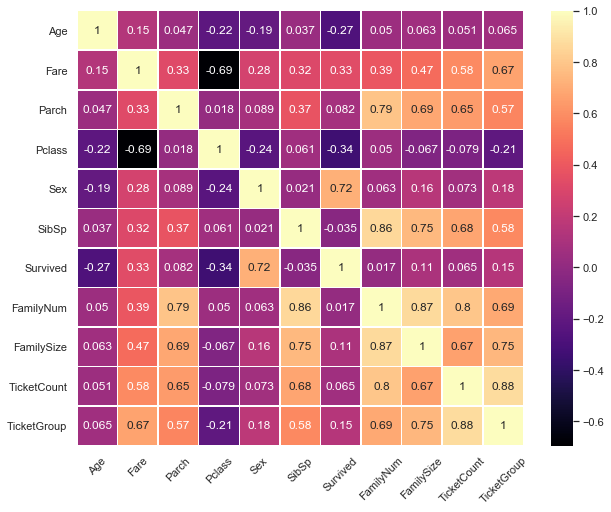

In [404]:
full.corr()['Survived']#查看相关性，手动淘汰与生存率相关性较小的特征
select_full = full.drop(['Name','Ticket','PassengerId','LastName','LastNameNum'],axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(select_full.corr(),cmap='magma',annot=True,linewidths=.5)
plt.xticks(rotation=45)
#先人工初步筛除与标签预测明显不相关或相关度很低的特征，再查看剩余特征与标签之间的相关性大小做进一步降维

In [408]:
select_full = select_full.drop(['Parch','SibSp','FamilyNum','TicketCount'],axis=1)
#编码
select_full=pd.get_dummies(select_full)
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
SexDf=pd.get_dummies(full['Sex'],prefix='Sex')
TicketGroupDf=pd.get_dummies(full['TicketGroup'],prefix='TickGroup')
FamilySizeDf=pd.get_dummies(full['FamilySize'],prefix='FamilySize')

select_full=pd.concat([select_full,PclassDf,SexDf,TicketGroupDf,FamilySizeDf],axis=1)

# 5. 构建模型

## 5.1 模型选择

### 5.1.1 拆分数据并从常用机器学习模型中筛选分类模型

In [568]:
#import机器学习相关库
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

classifiers = []
classifiers.append(RandomForestClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(LogisticRegression())
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(SVC())
#拆分数据集为训练集和预测集
known_X=select_full[select_full['Survived'].notnull()].drop(['Survived'],axis=1)
known_y=select_full[select_full['Survived'].notnull()]['Survived']
predict_X=select_full[select_full['Survived'].isnull()].drop(['Survived'],axis=1)

### 5.1.2 比较初步评估结果，筛选出最优的算法

In [546]:
kfold=StratifiedKFold(n_splits=10)
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,known_X,known_y,scoring='accuracy',cv=kfold,n_jobs=-1))
cv_mean = [i.mean() for i in cv_results]
cv_std = [i.std() for i in cv_results]
algorithm = ['RandomForestCla','AdaBoostCla','GradientBoostingCla','LogisticReg','KNeighborsCla','DecisionTreeCla','SVC']
mean_std = pd.DataFrame({'mean':cv_mean,'std':cv_std,'algorithm':algorithm})

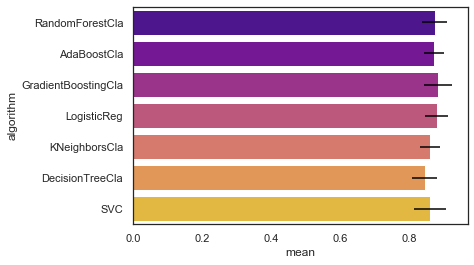

In [547]:
sns.barplot(mean_std['mean'],mean_std['algorithm'],xerr=mean_std['std'],palette='plasma')
#可以看到GradientBoostingClassifier和LogisticRegression表现较优

### 5.1.3 模型调优

In [548]:
#将训练集划分为train set和validation set
train_X,test_X,train_y,test_y = train_test_split(known_X,known_y,random_state=42)

构建GradientBoostingClassifier和LogisticRegression两种模型，调参后进一步对比

In [582]:
#构建GradientBoostingClassifier
GBC = GradientBoostingClassifier()
gbc_params = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4,6,8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]}
gbc_search = GridSearchCV(GBC,param_grid = gbc_params, cv=kfold,scoring="accuracy", n_jobs= -1, verbose = 1)
gbc_result = gbc_search.fit(train_X,train_y)
#构建LogisticRegression
LR=LogisticRegression()
lr_params = {'C' : [1,2,3],'penalty':['l1','l2']}
lr_search = GridSearchCV(LR,param_grid = lr_params, cv=kfold,scoring="accuracy", n_jobs= -1, verbose = 1)
lr_result = lr_search.fit(train_X,train_y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.1min finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### 5.1.3.1 查看accuracy

In [583]:
print('GBC模型的准确度为: %.3f'%gbc_result.best_score_)
print('GBC模型的最佳参数为: ',gbc_result.best_params_)
print('LR模型的准确度为: %.3f'%lr_result.best_score_)
print('LR模型的最佳参数为: ',lr_result.best_params_)

GBC模型的准确度为: 0.891
GBC模型的最佳参数为:  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 6, 'max_features': 0.1, 'min_samples_leaf': 100, 'n_estimators': 300}
LR模型的准确度为: 0.885
LR模型的最佳参数为:  {'C': 1, 'penalty': 'l2'}


GBC模型准确度稍微高一些， 再查看其他评价指标

#### 5.1.3.2 查看ROC曲线

In [584]:
#求出测试数据模型的预测值
gbc_predict_y=gbc_result.predict(test_X).astype(int)
lr_predict_y=lr_result.predict(test_X).astype(int)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr1,tpr1,threshold1 = roc_curve(test_y, gbc_predict_y) ###计算真正率和假正率
fpr2,tpr2,threshold2 = roc_curve(test_y, lr_predict_y)
roc_auc1 = auc(fpr1,tpr1) ###计算auc的值
roc_auc2 = auc(fpr2,tpr2)
print('GBC模型的auc值为: %.3f'%roc_auc1)
print('LR模型的auc值为: %.3f'%roc_auc2)

GBC模型的auc值为: 0.873
LR模型的auc值为: 0.862


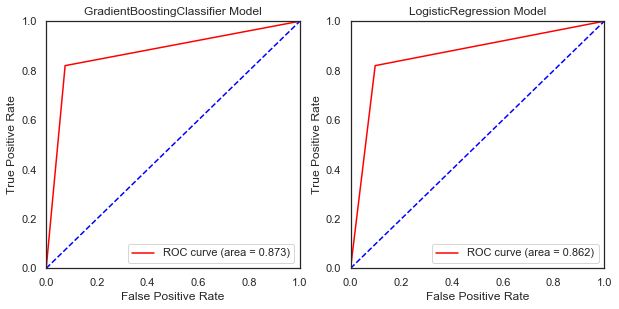

In [585]:
#查看模型ROC曲线
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(fpr1, tpr1, color='r', label='ROC curve (area = %0.3f)' % roc_auc1) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='b', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoostingClassifier Model')
plt.legend(loc=4)
plt.subplot(2,2,2)
plt.plot(fpr2, tpr2, color='r', label='ROC curve (area = %0.3f)' % roc_auc2) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='b', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression Model')
plt.legend(loc=4)

GradientBoostingClassifier和LogisticRegression模型ROC曲线均左上偏，GradientBoostingClassifier更接近于垂直；AUC分别为0.901和0.875，综合来看，GradientBoostingClassifier模型效果较好。

#### 5.1.3.3 查看confusion matrix

In [586]:
gbc_confusion_matrix = confusion_matrix(test_y,gbc_predict_y)
lr_confusion_matrix = confusion_matrix(test_y,lr_predict_y)
print('GBC模型的混淆矩阵为:\n',gbc_confusion_matrix)
print('LR模型的混淆矩阵为:\n',lr_confusion_matrix)

GBC模型的混淆矩阵为:
 [[124  10]
 [ 16  73]]
LR模型的混淆矩阵为:
 [[121  13]
 [ 16  73]]


#### 5.1.3.4 查看F1 score

In [587]:
gbc_f1_score = f1_score(test_y,gbc_predict_y)
lr_f1_score = f1_score(test_y,lr_predict_y)
print('GBC模型的F1 score为: %.3f'%gbc_f1_score)
print('LR模型的F1 score为: %.3f'%lr_f1_score)

GBC模型的F1 score为: 0.849
LR模型的F1 score为: 0.834


经过上述比较，最终选择GBC模型

# 6. 模型预测

In [589]:
#predict survived or not
predict_y = gbc_result.predict(predict_X).astype(int)
#导出预测结果为csv文件
final_result=pd.DataFrame()
final_result['PassengerId'] = full[full['Survived'].isnull()]['PassengerId']
final_result['Survived'] = predict_y
final_result
final_result.to_csv('TitanicGBC1.csv',index=False)